Epoch 1/3


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6769 - loss: 0.5870 - val_accuracy: 0.7142 - val_loss: 0.5766
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8507 - loss: 0.3613 - val_accuracy: 0.8412 - val_loss: 0.3823
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9121 - loss: 0.2281 - val_accuracy: 0.8402 - val_loss: 0.3949
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8322 - loss: 0.4189
Test accuracy: 0.8321599960327148


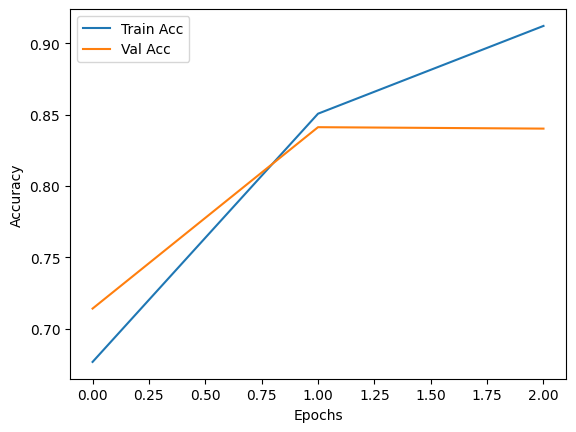

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=10000)
xtrain=pad_sequences(xtrain,maxlen=200)
xtest=pad_sequences(xtest,maxlen=200)

model=Sequential([
    Embedding(10000,32,input_length=200),
    SimpleRNN(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=5,batch_size=64,validation_data=(xtest,ytest))


plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label='training loss')
plt.legend()
plt.show()